<a href="https://colab.research.google.com/github/16Komang/PCVK/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


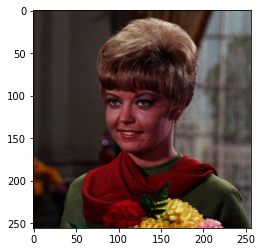

In [12]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io 
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('/content/drive/MyDrive/Images/female.tiff')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

# 1. Buat Gamma Correction sesuai dengan petunjuk berikut

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


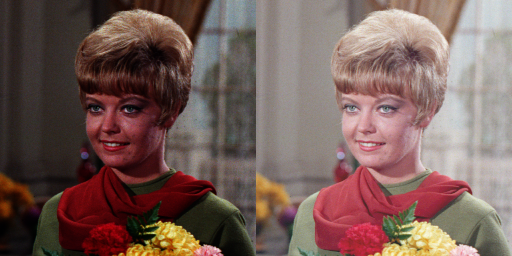

In [18]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

#Menampilkan perbandingan sebelum dan sesudah Gama Correction Menggunakan BGR2RBG
original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1/gamma)), 0, 255)
     
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

## 2. Buat Simulasi Image Depth

 bitdepth Correction pada citra 
----------------------------------
Masukkan nilai Depth: 2


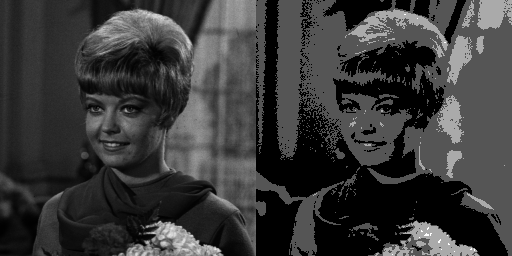

In [34]:
print(' bitdepth Correction pada citra ')
print('----------------------------------')
try:
  bd = float(input('Masukkan nilai Depth: '))
except ValueError:
  print('Error, not a number')

#Menampilkan perbandingan sebelum dan sesudah Gama Correction Menggunakan Grayscale
original = cv.imread('/content/drive/MyDrive/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

bit_depth=2
level = 255 / (pow(2,bit_depth)-1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
      depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255);
     
final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

## 3. Buat modul Average Denoising

# Noise Number 5

Nilai PSNR adalah 27.53455225120282 (dB)


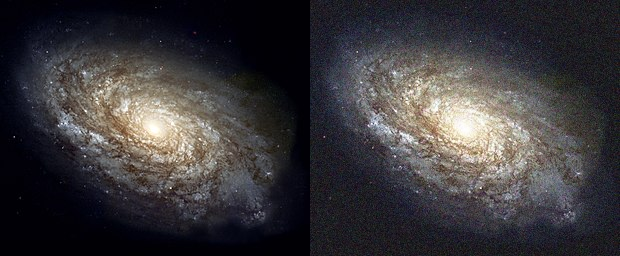

In [47]:
import glob
from math import log10
from math import sqrt

original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

dst = cv_img[0]
noise_number = 4
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
  mse = np.mean((original - compressed) ** 2)
  if(mse == 0): 
    # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
      return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)
     

# Noise Number 30

Nilai PSNR adalah 27.52226512028416 (dB)


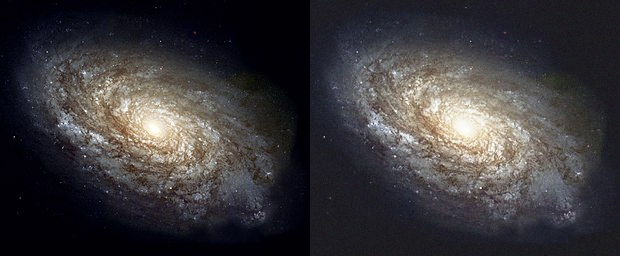

In [48]:
dst = cv_img[0]
noise_number = 29
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)
        
        compressed = dst
        psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

# Noise Number 60

Nilai PSNR adalah 27.4975709242478 (dB)


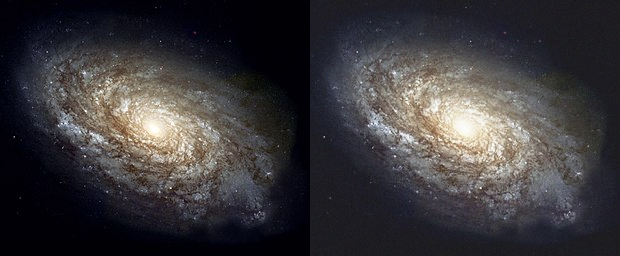

In [49]:
dst = cv_img[0]
noise_number = 59
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)
        
        compressed = dst
        psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

# Noise Number 80

Nilai PSNR adalah 27.500143061043296 (dB)


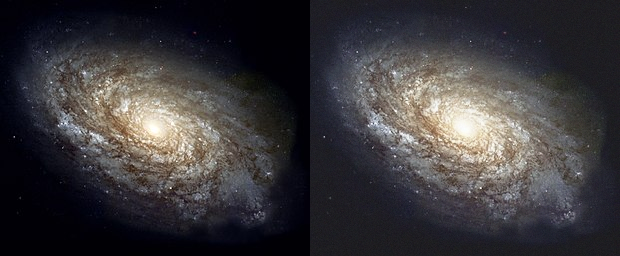

In [50]:
dst = cv_img[0]
noise_number = 79
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)
        
        compressed = dst
        psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

# Noise Number 100

Nilai PSNR adalah 27.506206042303745 (dB)


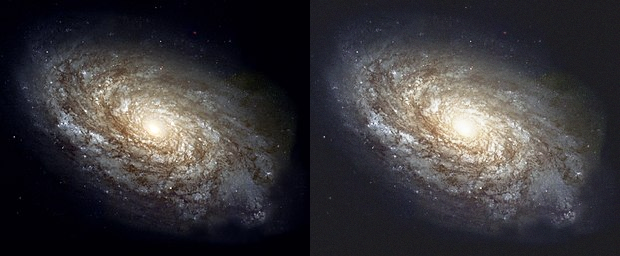

In [52]:
dst = cv_img[0]
noise_number = 99
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)
        
        compressed = dst
        psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

# Kesimpulan
Kesimpulan yang bisa saya amblil adalah semakinn besar nilai dari noise_numbernya maka bintik-bintik(noise) dari gambar akan semakin sedikit bisa di bedakan di setiap number_noise yang ada di atas.

# 4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),sedangkan image paling kanan adalah hasilnya

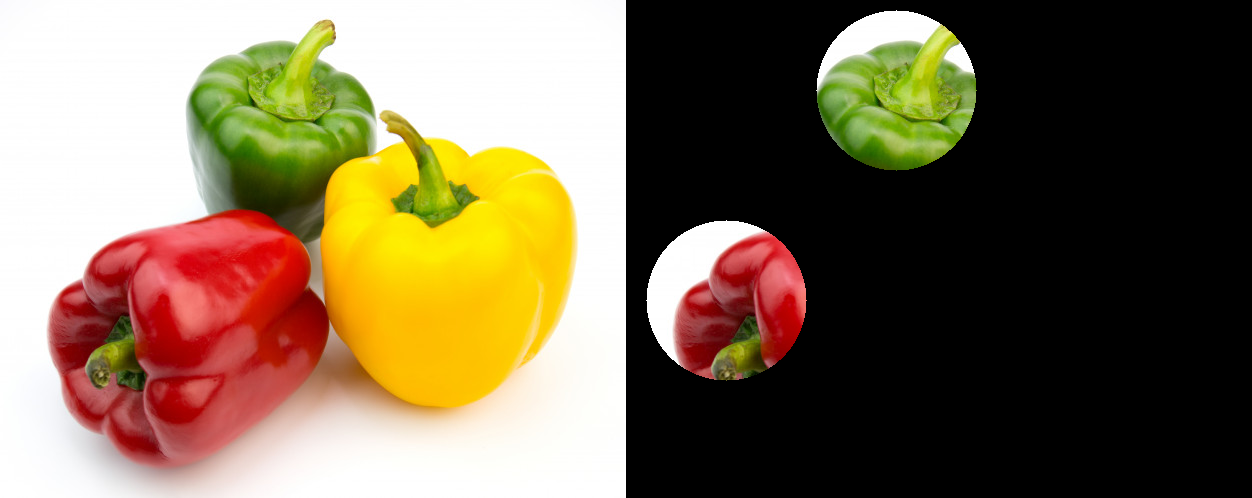

In [149]:
img_t = cv.imread('/content/drive/MyDrive/Images/peppers.jpg')

mask1 = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask1,(100,300),80,(255,255,255),-1)

mask2 = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask2,(270,90),80,(255,255,255),-1)
result = img_t & (mask1 + mask2)

teeth_frame = cv.hconcat((img_t, result))
cv2_imshow(teeth_frame)
     
